In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/PRML_A2/Q2/train_data.csv')
data2 = pd.read_csv('/content/drive/MyDrive/PRML_A2/Q2/train_data_2.csv')
data1 = data1.to_numpy()
data2 = data2.to_numpy()

In [ ]:
print(data1.shape, data2.shape)

(2300, 2) (100, 2)


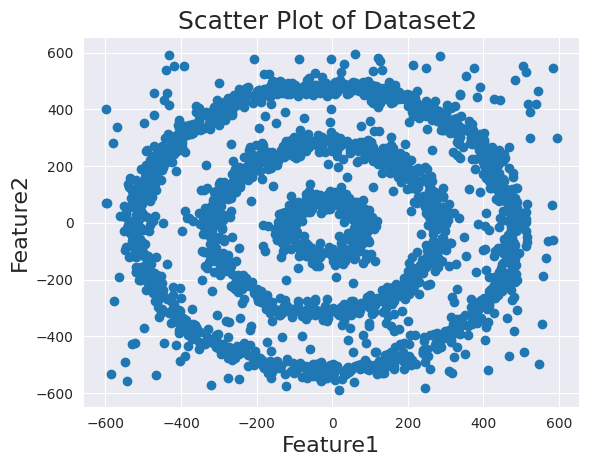

In [ ]:
sns.set_style('darkgrid')
plt.scatter(data1[:, 0], data1[:, 1])
plt.xlabel('Feature1', fontsize = 16)
plt.ylabel('Feature2', fontsize = 16)
plt.title('Scatter Plot of Dataset2 ', fontsize = 18)
plt.show()

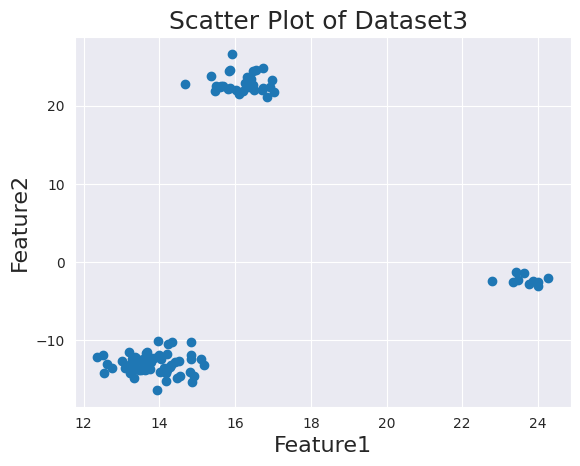

In [ ]:
sns.set_style('darkgrid')
plt.scatter(data2[:, 0], data2[:, 1])
plt.xlabel('Feature1', fontsize = 16)
plt.ylabel('Feature2', fontsize = 16)
plt.title('Scatter Plot of Dataset3 ', fontsize = 18)
plt.show()

In [ ]:
distances = np.zeros((data1.shape[0], data1.shape[0]))
for i in range(data1.shape[0]):
  for j in range(data1.shape[0]):
    distances[i,j] = euclidean(data1[i], data1[j])

sorted_distances = np.sort(distances, axis=1)

In [ ]:
distances_2 = np.zeros((data2.shape[0], data2.shape[0]))
for i in range(data2.shape[0]):
  for j in range(data2.shape[0]):
    distances_2[i,j] = euclidean(data2[i], data2[j])

sorted_distances_2 = np.sort(distances_2, axis=1)

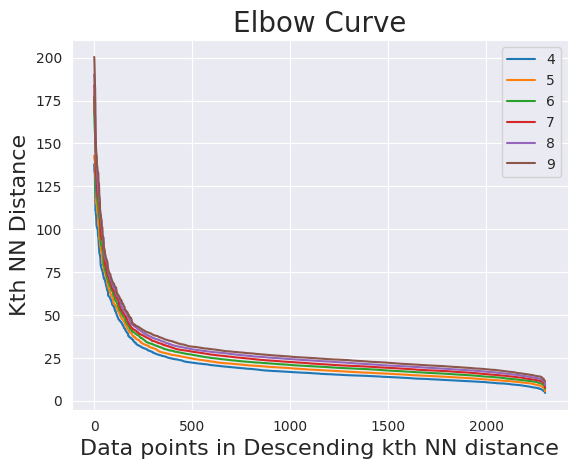

In [ ]:
for k in range(4, 10):
  k_nearest_distances = sorted_distances[:, k]
  sorted_k_nearest_distances = np.sort(k_nearest_distances)[::-1]
  plt.plot(sorted_k_nearest_distances, label = k)

plt.title('Elbow Curve', fontsize = 20)
plt.xlabel('Data points in Descending kth NN distance', fontsize = 16)
plt.ylabel('Kth NN Distance', fontsize = 16)
plt.legend()
plt.show()

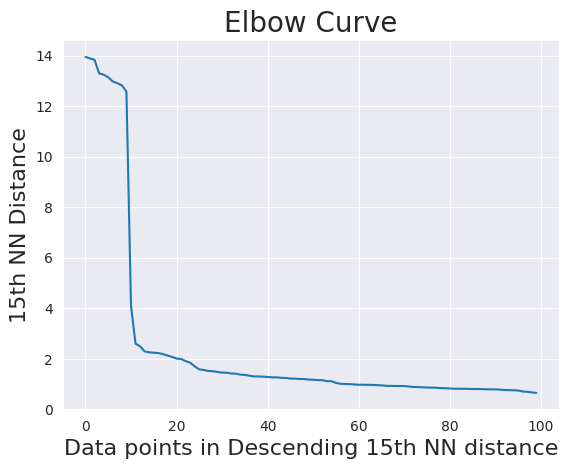

In [ ]:
k = 15
k_nearest_distances_2 = sorted_distances_2[:, k]
sorted_k_nearest_distances_2 = np.sort(k_nearest_distances_2)[::-1]
plt.plot(sorted_k_nearest_distances_2)

plt.title('Elbow Curve', fontsize = 20)
plt.xlabel('Data points in Descending 15th NN distance', fontsize = 16)
plt.ylabel('15th NN Distance', fontsize = 16)
plt.show()

In [ ]:
def get_neighbors(X, i, eps):
    neighbors = []
    for j in range(len(X)):
        if i != j and euclidean(X[i], X[j]) <= eps:
            neighbors.append(j)
    return np.asarray(neighbors)

def dbscan(X, eps, min_samples):

    labels = np.zeros(len(X))
    C = 0
    for i in range(len(X)):
        # Checking if point is already assigned to a cluster
        if labels[i] != 0:
            continue
        # Get neighbors of current point
        neighbors = get_neighbors(X, i, eps)
        # If number of neighbors is less than min_samples, mark as noise
        if len(neighbors) < min_samples:
            labels[i] = -1
        else:
            # Assign new cluster index
            C += 1

            # Assign current point to new cluster
            labels[i] = C

            # Iterate through neighbors
            while len(neighbors) > 0:
                neighbor = neighbors[0]
                neighbors = np.delete(neighbors, 0)

                # If neighbor is not assigned, assign to current cluster
                if labels[neighbor] == 0:
                    labels[neighbor] = C

                    # Find neighbors of neighbor
                    new_neighbors = get_neighbors(X, neighbor, eps)

                    # If number of neighbors is greater than min_samples(core points), add to list of neighbors
                    if len(new_neighbors) >= min_samples:
                      neighbors = np.union1d(neighbors, new_neighbors)
                    else: # if less than min_points then it is a border point so just include it in the current cluster no need to agin iterate through them
                      for i in new_neighbors:
                        labels[i] = C
    return labels

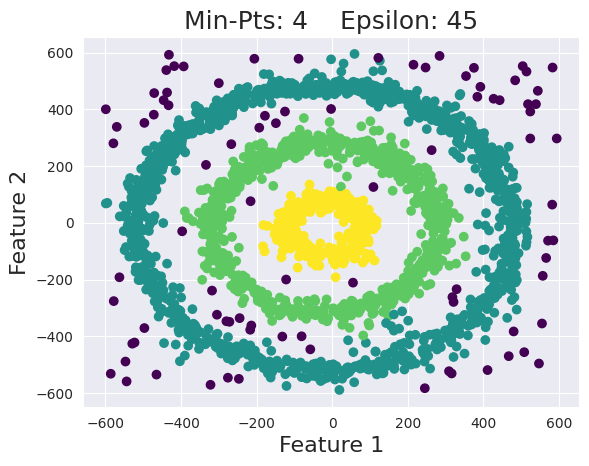

In [ ]:
min_pts = 4
epsilon = 45
labels = dbscan(data1, epsilon, min_pts)
plt.scatter(data1[:, 0], data1[:, 1], c= labels, cmap = 'viridis')
plt.xlabel('Feature 1', fontsize = 16)
plt.ylabel('Feature 2', fontsize = 16)
plt.title(f'Min-Pts: {min_pts}    Epsilon: {epsilon}', fontsize = 18)
plt.show()

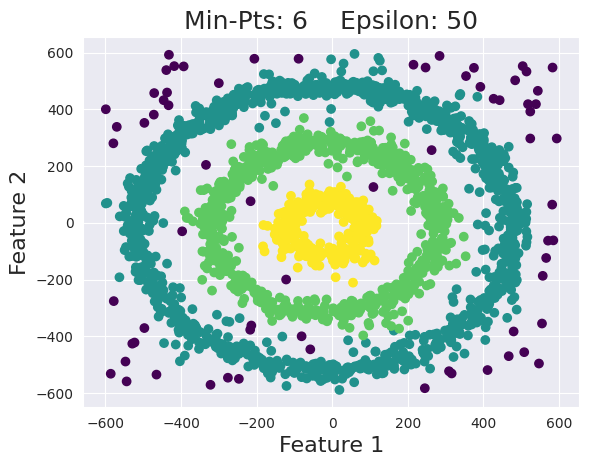

In [ ]:
min_pts = 6
epsilon = 50
labels = dbscan(data1, epsilon, min_pts)
plt.scatter(data1[:, 0], data1[:, 1], c= labels, cmap = 'viridis')
plt.xlabel('Feature 1', fontsize = 16)
plt.ylabel('Feature 2', fontsize = 16)
plt.title(f'Min-Pts: {min_pts}    Epsilon: {epsilon}', fontsize = 18)
plt.show()

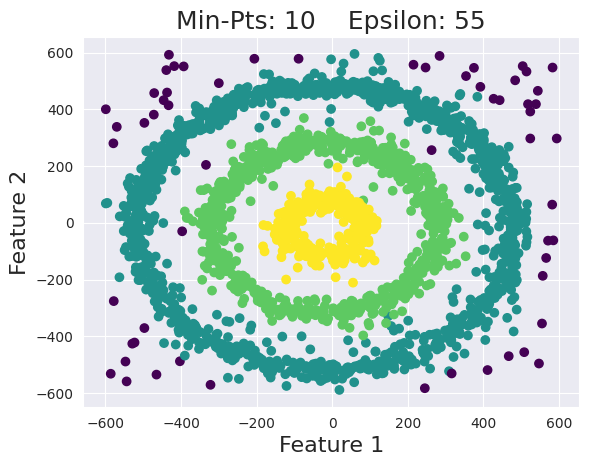

In [ ]:
min_pts = 10
epsilon = 55
labels = dbscan(data1, epsilon, min_pts)
plt.scatter(data1[:, 0], data1[:, 1], c= labels, cmap = 'viridis')
plt.xlabel('Feature 1', fontsize = 16)
plt.ylabel('Feature 2', fontsize = 16)
plt.title(f'Min-Pts: {min_pts}    Epsilon: {epsilon}', fontsize = 18)
plt.show()

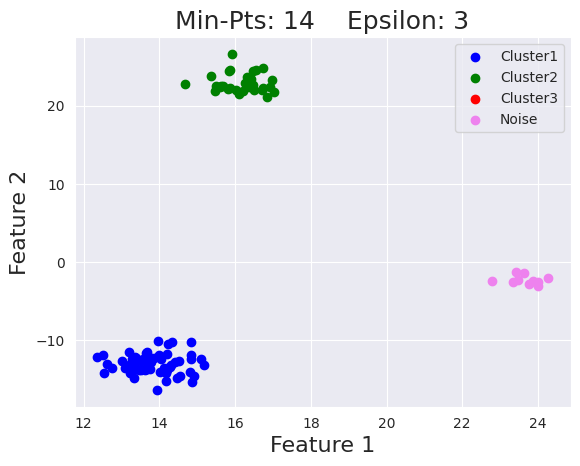

In [ ]:
min_pts = 14
epsilon = 3
labels = dbscan(data2, epsilon, min_pts)
names = {-1: 'Noise', 1:'Cluster1', 2:'Cluster2', 3:'Cluster3'}
colors = {-1: 'violet', 1:'blue', 2:'green', 3: 'red'}
for i in [1, 2, 3]:
  plt.scatter(data2[labels == i][:, 0], data2[labels == i][:, 1], c = colors[i], label = names[i])
plt.scatter(data2[labels == -1][:, 0], data2[labels == -1][:, 1], c = colors[-1], label = names[-1])
plt.xlabel('Feature 1', fontsize = 16)
plt.ylabel('Feature 2', fontsize = 16)
plt.title(f'Min-Pts: {min_pts}    Epsilon: {epsilon}', fontsize = 18)
plt.legend()
plt.show()

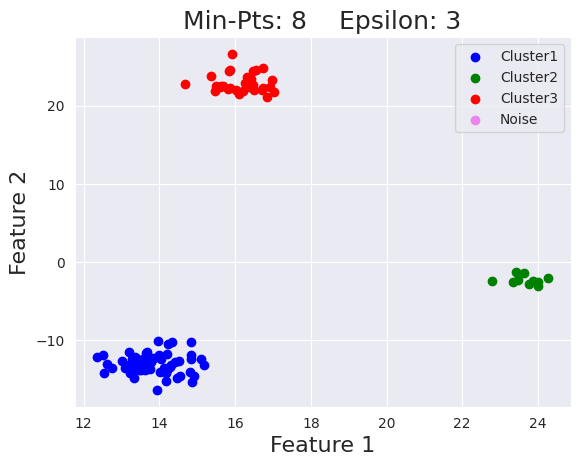

In [ ]:
min_pts = 8
epsilon = 3
labels = dbscan(data2, epsilon, min_pts)
names = {-1: 'Noise', 1:'Cluster1', 2:'Cluster2', 3:'Cluster3'}
colors = {-1: 'violet', 1:'blue', 2:'green', 3: 'red'}
for i in [1, 2, 3]:
  plt.scatter(data2[labels == i][:, 0], data2[labels == i][:, 1], c = colors[i], label = names[i])
plt.scatter(data2[labels == -1][:, 0], data2[labels == -1][:, 1], c = colors[-1], label = names[-1])
plt.xlabel('Feature 1', fontsize = 16)
plt.ylabel('Feature 2', fontsize = 16)
plt.title(f'Min-Pts: {min_pts}    Epsilon: {epsilon}', fontsize = 18)
plt.legend()
plt.show()

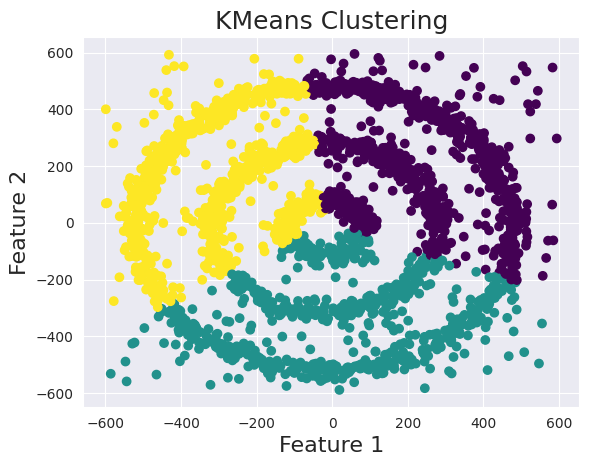

In [ ]:
kmeans = KMeans(n_clusters = 3, n_init = 'auto')
kmeans.fit(data1)
labels = kmeans.predict(data1)
plt.scatter(data1[:, 0], data1[:, 1], c = labels,  cmap = 'viridis')
plt.xlabel('Feature 1', fontsize = 16)
plt.ylabel('Feature 2', fontsize = 16)
plt.title('KMeans Clustering', fontsize = 18)
plt.show()

In [ ]:
print([1]*2)

[1, 1]


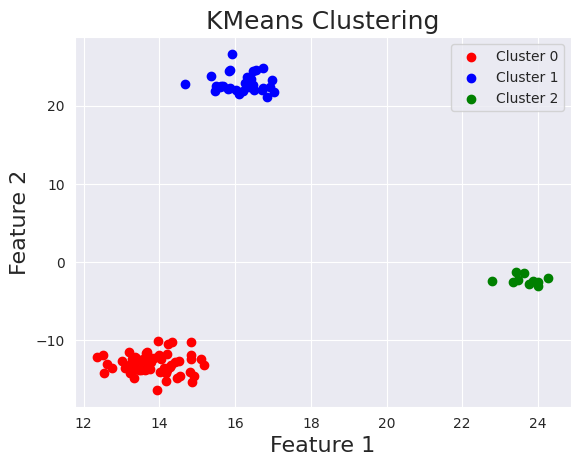

In [ ]:
kmeans = KMeans(n_clusters = 3, n_init = 'auto')
kmeans.fit(data2)
labels = kmeans.predict(data2)
colors = {0: 'red', 1:'blue', 2:'green'}
for i in range(len(np.unique(labels))):
  plt.scatter(data2[labels == i][:, 0], data2[labels == i][:, 1], c = colors[i], label = f'Cluster {i}')
plt.xlabel('Feature 1', fontsize = 16)
plt.ylabel('Feature 2', fontsize = 16)
plt.title('KMeans Clustering', fontsize = 18)
plt.legend()
plt.show()